In [27]:
import os

import nibabel as nib
import numpy as np

from nilearn import datasets, plotting, image

In [28]:
out_path = os.path.join(os.getcwd(), 'img_data')
mni_template = datasets.load_mni152_template()
yeo_atlas = datasets.fetch_atlas_yeo_2011()

In [29]:
plotting.view_img(mni_template, cmap='gray', symmetric_map=False)

/home/jtorretr/anaconda3/envs/ibc/lib/python3.7/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/jtorretr/anaconda3/envs/ibc/lib/python3.7/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


In [21]:
data = nib.load(yeo_atlas.thick_7)
atlas = data.get_data()

yeo_labels = {1: 'visual_network',
             2: 'somatomotor_network',
             3: 'dorsal_attention_network',
             4: 'ventral_attention_network',
             5: 'limbic_network',
             6: 'frontoparietal_network',
             7: 'default_mode_network'}

/home/jtorretr/anaconda3/envs/ibc/lib/python3.7/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


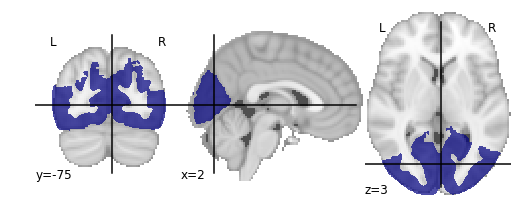

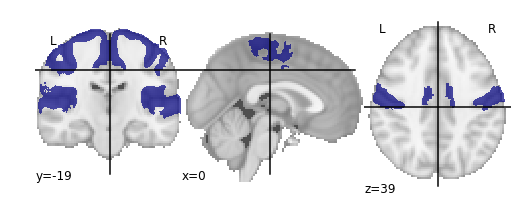

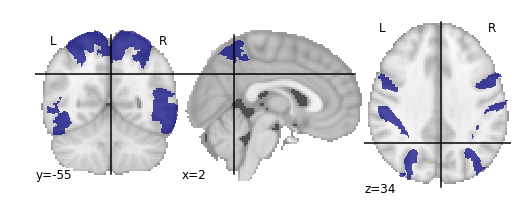

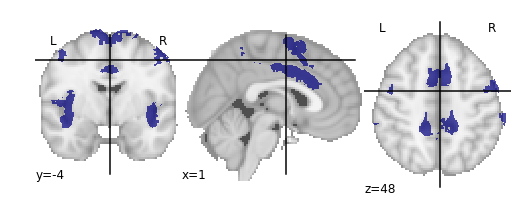

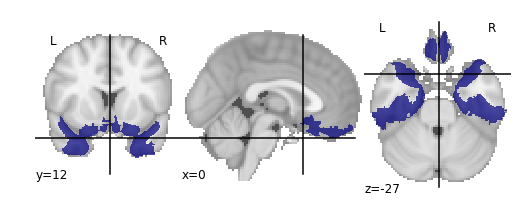

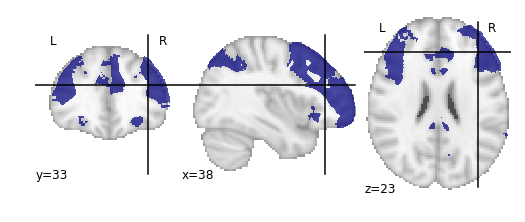

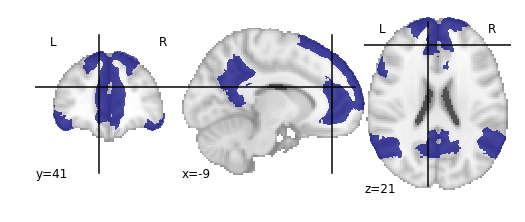

In [30]:
for label in np.unique(atlas):
    if label == 0:
        continue
    new_atlas = np.zeros(data.shape)
    new_atlas[atlas == label] = 1
    a_network = image.new_img_like(data, new_atlas)

    plotting.plot_roi(a_network)
    
    map_name = yeo_labels[label] + '.nii.gz'
    a_network.to_filename(os.path.join(out_path,
                                      map_name))